In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import cartopy.crs as crs
from sklearn.metrics import mean_squared_error
from math import sqrt

# 1 Questao: Leitura de dois arquivos NetCDF com dados de temperatura, sendo um com dados de observacao e o outro com dados previstos

In [3]:
observacao=xr.open_dataset('observation.nc')
previsao=xr.open_dataset('forecast.nc')

# Visualizacao das variaveis em cada arquivo NetCDF

In [4]:
observacao #

<xarray.Dataset>
Dimensions:      (lat: 25, lon: 37, time: 72)
Coordinates:
  * time         (time) datetime64[ns] 2018-04-14 ... 2018-04-16T23:00:00
  * lon          (lon) float32 -52.99 -52.75 -52.51 ... -44.74 -44.49 -44.25
  * lat          (lat) float32 -25.29 -25.07 -24.85 ... -20.37 -20.14 -19.92
Data variables:
    temperatura  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Apr 19 18:43:01 2018: cdo remapbil,gridfile observation...
    CDO:          Climate Data Operators version 1.9.1 (http://mpimet.mpg.de/...

In [5]:
observacao.temperatura

<xarray.DataArray 'temperatura' (time: 72, lat: 25, lon: 37)>
array([[[24.555346, 22.20913 , ..., 24.205818,       nan],
        [23.840425, 22.546028, ..., 24.124369,       nan],
        ...,
        [23.229092, 23.090694, ..., 18.455933, 19.171835],
        [22.799225, 23.16104 , ..., 18.255274, 19.366264]],

       [[23.0389  , 21.056534, ..., 24.088018,       nan],
        [22.427336, 21.402102, ..., 24.104513,       nan],
        ...,
        [22.154556, 22.138018, ..., 17.976265, 19.02524 ],
        [21.689274, 22.266026, ..., 17.89095 , 19.179226]],

       ...,

       [[20.864983, 20.555113, ..., 23.012321,       nan],
        [19.79059 , 20.03081 , ..., 23.089334,       nan],
        ...,
        [23.969128, 23.410042, ..., 18.679354, 18.17804 ],
        [23.27986 , 22.92126 , ..., 19.021667, 19.106825]],

       [[20.596725, 19.856867, ..., 22.478777,       nan],
        [19.287607, 19.183558, ..., 22.692806,       nan],
        ...,
        [22.975115, 22.516788, ..., 18.188711, 17.953955],
        [22.350718, 22.17121 , ..., 18.466291, 18.797155]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-04-14 ... 2018-04-16T23:00:00
  * lon      (lon) float32 -52.99 -52.75 -52.51 -52.26 ... -44.74 -44.49 -44.25
  * lat      (lat) float32 -25.29 -25.07 -24.85 -24.63 ... -20.37 -20.14 -19.92

In [20]:
previsao

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 37, time: 72)
Coordinates:
  * lat      (lat) float32 -25.29 -25.07 -24.85 -24.63 ... -20.37 -20.14 -19.92
  * lon      (lon) float32 -52.99 -52.75 -52.51 -52.26 ... -44.74 -44.49 -44.25
  * time     (time) datetime64[ns] 2018-04-14 ... 2018-04-16T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 297.9 297.6 297.4 ... 291.7 291.2 290.8

In [7]:
previsao.t2m # A temperatura previsata esta em graus Kelven

<xarray.DataArray 't2m' (time: 72, lat: 25, lon: 37)>
array([[[297.877  , 297.63263, ..., 299.25424, 299.30008],
        [297.74246, 297.74384, ..., 299.2265 , 299.3053 ],
        ...,
        [299.04578, 299.2516 , ..., 294.84918, 294.56836],
        [299.08432, 298.5864 , ..., 295.1606 , 295.1203 ]],

       [[297.46564, 297.10782, ..., 299.25485, 299.29617],
        [297.4523 , 297.36044, ..., 299.27005, 299.3341 ],
        ...,
        [298.6316 , 298.81693, ..., 294.4425 , 294.14966],
        [298.59766, 298.15414, ..., 294.75757, 294.67786]],

       ...,

       [[295.2503 , 294.71097, ..., 297.40695, 297.42773],
        [295.18915, 294.97858, ..., 297.5523 , 297.58896],
        ...,
        [297.19724, 297.2767 , ..., 291.21002, 290.67703],
        [297.59836, 296.94394, ..., 291.68857, 291.28857]],

       [[294.56735, 293.98807, ..., 297.3598 , 297.44885],
        [294.444  , 294.20996, ..., 297.52225, 297.59085],
        ...,
        [296.74274, 296.7859 , ..., 290.6997 , 290.27243],
        [296.8694 , 296.3436 , ..., 291.17657, 290.83813]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -25.29 -25.07 -24.85 -24.63 ... -20.37 -20.14 -19.92
  * lon      (lon) float32 -52.99 -52.75 -52.51 -52.26 ... -44.74 -44.49 -44.25
  * time     (time) datetime64[ns] 2018-04-14 ... 2018-04-16T23:00:00

# 2 Questao: Calcular o índice RMSE para cada intervalo de 6 horas na série temporal em todos os pontos da matriz

In [21]:
rms=observacao.temperatura[:12,:]*0
for i in range(len(rms)):
    for j in range(len(observacao.lat)):
        for k in range(len(observacao.lon)):
            rms[i,j,k]=(sqrt(np.nanmean((observacao.temperatura[i*6:i*6+5,j,k]-(previsao.t2m[i*6:i*6+5,j,k]-273.15))**2,axis=0)))

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/gabriel/anaconda3/lib/python3.7/site-packa

# Salvando o indice RMSE em arquivo netCDF

In [352]:
rms.to_netcdf('RMS.nc')

# 3 Questao Plotar mapas de duas dimensões do índice de cada período

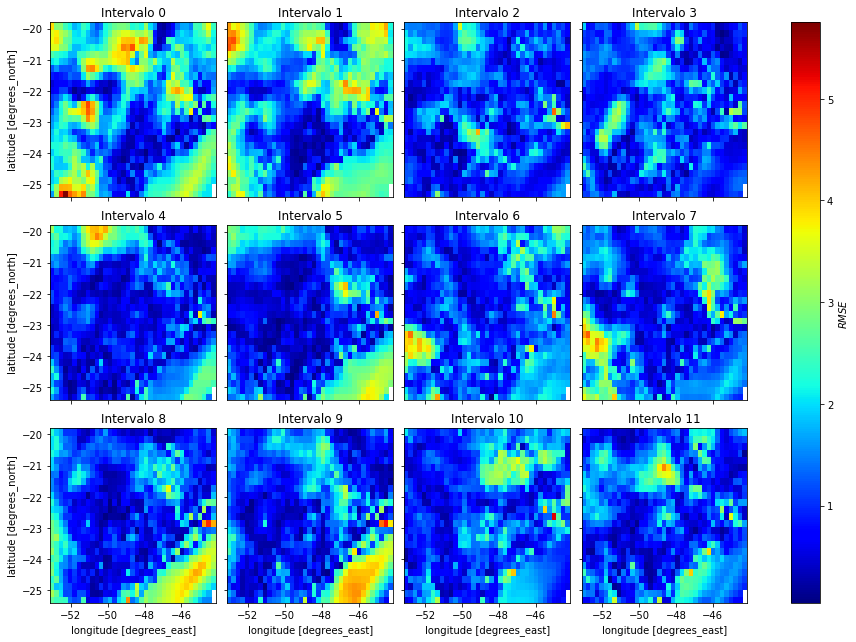

In [22]:
g = rms.plot.pcolormesh("lon","lat",col="time",col_wrap=4,cmap="jet", cbar_kwargs={"label": "$RMSE$",},)
for i, ax in enumerate(g.axes.flat):
    ax.set_title("Intervalo %d" % i)

# 4 Questao: Plotar um gráfico da série temporal do mesmo índice para São Paulo
#(Latitude -23.5489 e Longitude -46.6388, ao ponto Y: 8 e X: 26 na grade)

Text(0.5, 1.0, '$RMSE$ para Cidade de São Paulo (lon= -46.6783, lat=-23.52493)')

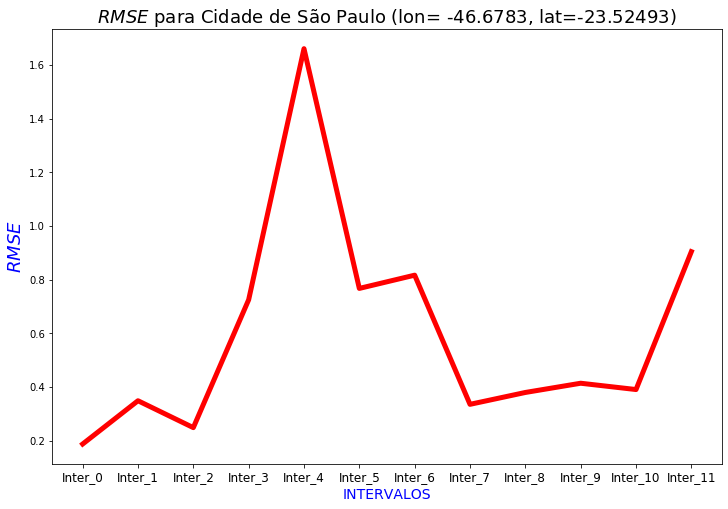

In [23]:
x = np.arange(12)
x_labels = ['Inter_0', 'Inter_1', 'Inter_2', 'Inter_3', 'Inter_4', 'Inter_5', 'Inter_6', 'Inter_7', 'Inter_8', 'Inter_9','Inter_10','Inter_11']
y =rms[:,8,26]
fig, ax = plt.subplots(ncols=1,figsize=(12,8))
plt.plot(y,lw=5,color='r')
plt.xticks(x, x_labels,fontsize=12)
ax.set_ylabel(r"$RMSE$", fontsize=18, color="blue")
ax.set_xlabel("INTERVALOS", fontsize=14, color="blue")
plt.title('$RMSE$ para Cidade de São Paulo (lon= -46.6783, lat=-23.52493)',fontsize=18)